In [ ]:
!pip install kaggle


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d ahmedaliraja/customer-satisfaction-10k -p /content/datasets

Dataset URL: https://www.kaggle.com/datasets/ahmedaliraja/customer-satisfaction-10k
License(s): other
  0% 0.00/33.4k [00:00<?, ?B/s]
100% 33.4k/33.4k [00:00<00:00, 38.8MB/s]


In [ ]:
!unzip /content/datasets/customer-satisfaction-10k.zip

Archive:  /content/datasets/customer-satisfaction-10k.zip
  inflating: Customer-survey-data.csv  


In [ ]:
import pandas as pd
df = pd.read_csv("Customer-survey-data.csv")
print(df.head())

   Customer  \
0         1   
1         2   
2         3   
3         4   
4         5   

   How satisfied were you with your overall delivery experience at Ali?                    1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied  \
0                                                5.0                                                                                                          
1                                                3.0                                                                                                          
2                                                4.0                                                                                                          
3                                                5.0                                                                                                          
4                                                2.0                                                              

# renommer les colonnes

In [ ]:
import pandas as pd
df = df.rename(columns={
    'How satisfied were you with your overall delivery experience at Ali?                    1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied': 'Exp_Livraison',
    'How satisfied were you with the quality of the food at Alis?                             1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied': 'Qualite_Nourriture',
    'How satisfied were you with the speed of delivery at Alis?                                1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied': 'Rapidite_Livraison',
    'Was your order accurate? Please respond yes or no.': 'Order_Accurate'
})
print(df.columns)


Index(['Customer', 'Exp_Livraison', 'Qualite_Nourriture', 'Rapidite_Livraison',
       'Order_Accurate'],
      dtype='object')


# Répartition des Précisions des Commandes



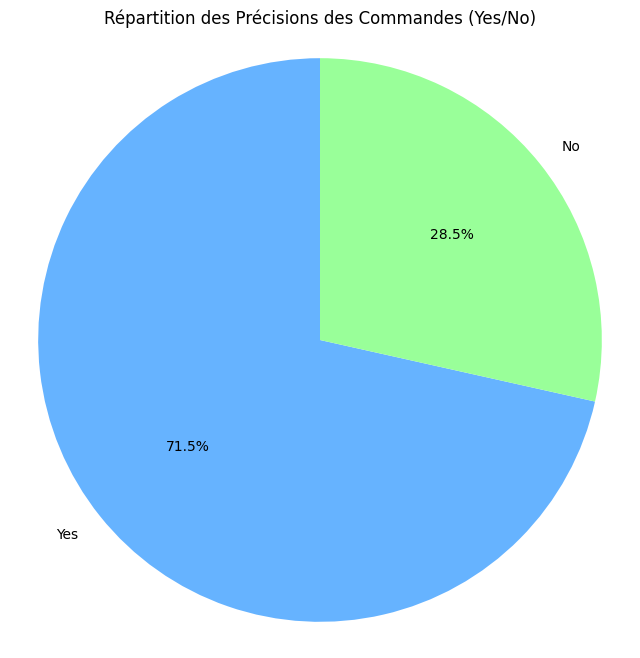

In [ ]:
import matplotlib.pyplot as plt

order_counts = df['Order_Accurate'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(order_counts, labels=order_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])
plt.title('Répartition des Précisions des Commandes (Yes/No)')
plt.axis('equal')
plt.show()


In [ ]:
df.describe()


,Customer,Exp_Livraison,Qualite_Nourriture,Rapidite_Livraison,Order_Accurate
count,10616.000000,10198.000000,10364.000000,10377.000000,0.0
mean,5308.500000,3.325260,3.332015,3.322926,NaN
std,3064.719563,1.419754,1.414709,1.408918,NaN
min,1.000000,1.000000,1.000000,1.000000,NaN
25%,2654.750000,2.000000,2.000000,2.000000,NaN
50%,5308.500000,3.000000,3.000000,3.000000,NaN
75%,7962.250000,5.000000,5.000000,5.000000,NaN
max,10616.000000,5.000000,5.000000,5.000000,NaN


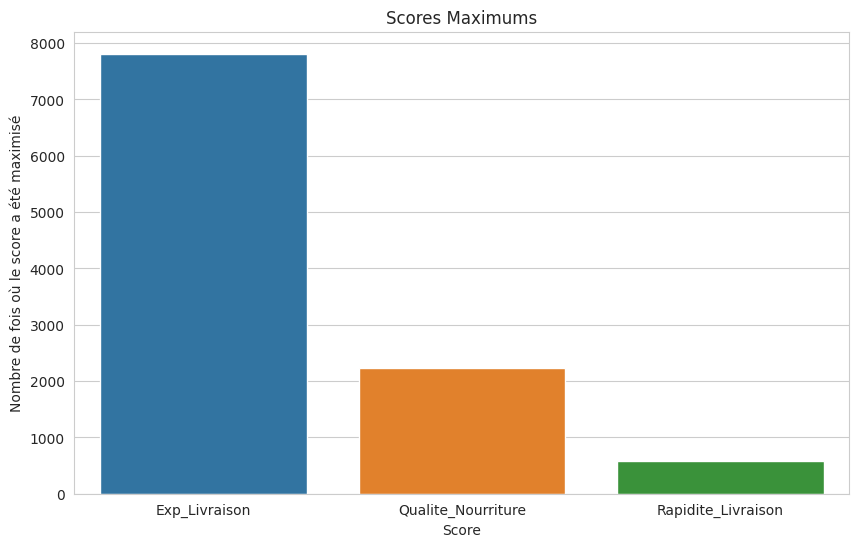

In [ ]:
#score maximum pour chaque ligne
df_max = df.iloc[:, 1:].idxmax(axis=1).value_counts().to_frame().T
plt.figure(figsize=(10, 6))
sns.barplot(data=df_max)
plt.title('Scores Maximums')
plt.xlabel('Score')
plt.ylabel('Nombre de fois où le score a été maximisé')

plt.show()


# Supprimer les lignes contenant des valeurs manquantes

In [ ]:
df = df.dropna()

# Separation des features et target

In [ ]:
X = df.drop(columns=['Customer', 'Was your order accurate? Please respond yes or no.'])
y = df['Was your order accurate? Please respond yes or no.']

# ensembles d'entraînement et de test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation des données

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_1 = scaler.fit_transform(X_train)
X_test_1 = scaler.transform(X_test)


# Entraînement du modèle SVM

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_1, y_train)


SVC(kernel='linear')

# Prédiction et évaluation du modèle

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = svm_model.predict(X_test_1)
#Score
score = accuracy_score(y_test, y_pred)
print("Score:", score)
#Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de Confusion :\n", conf_matrix)


Score: 0.7112903225806452
Matrice de Confusion :
 [[   0  537]
 [   0 1323]]


# **Construction du modèle  arbre de decision**

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier(max_depth =3, random_state = 42)
clf.fit(X_train_1, y_train)
y_pred = clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


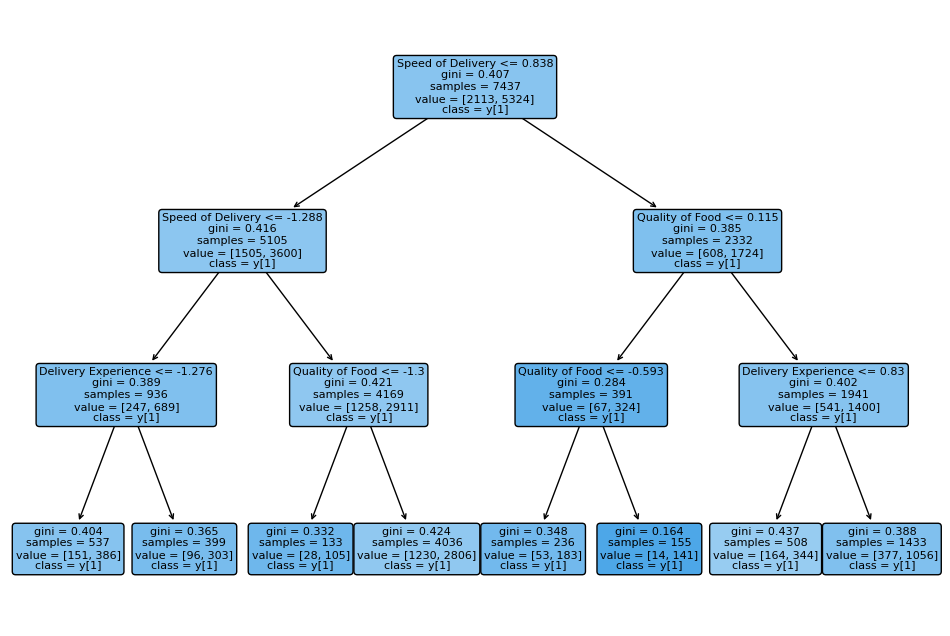

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
tree_plot = plot_tree(clf, filled=True, feature_names=['Delivery Experience', 'Quality of Food', 'Speed of Delivery'], class_names=True, rounded=True, fontsize=8)
plt.show()

# **Evaluation du modèle**

In [ ]:
print("Model score: ",clf.score(X_test, y_test))

Model score:  0.7112903225806452


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


#L'apprentissage par le modèle de Régression Logistique

Construire un modèle de régression logistique

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_1, y_train)

LogisticRegression()

Évaluer le modèle à l'aide de la matrice de confusion

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test_1)
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
print("y_pred=",y_pred)
print("conf_matrix=",conf_matrix)

y_pred= ['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
conf_matrix= [[   0  537]
 [   0 1323]]


Mesurer la précision

In [ ]:
from sklearn.metrics import  accuracy_score, precision_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')

print(f"Précision : {accuracy}")

Précision : 0.7112903225806452


#L'appretissage par le modèle KNN

Construire le modèle KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k = 5  # nombre de voisins à considérer
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train_1, y_train)

KNeighborsClassifier()

Evaluer le modèle à l'aide de la matrice de confusion

In [ ]:
y_pred = model.predict(X_test_1)
conf_matrix = confusion_matrix(y_test, y_pred)
print("y_pred=",y_pred)
print("conf_matrix=",conf_matrix)

y_pred= ['No' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
conf_matrix= [[  89  448]
 [ 175 1148]]


Validation croisée pour trouver la meilleure valeur de K

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
k_values = np.arange(1, 21)


cv_scores = []


for k in k_values:

    knn_cv = KNeighborsClassifier(n_neighbors=k)

    scores = cross_val_score(knn_cv, X_train, y_train, cv=5)

    cv_scores.append(scores.mean())

# Trouver la meilleure valeur de K et le meilleur score
best_k = k_values[np.argmax(cv_scores)]
best_score = np.max(cv_scores)

print("Meilleure valeur de K:", best_k)
print("Meilleur score de validation croisée:", best_score)

Meilleure valeur de K: 19
Meilleur score de validation croisée: 0.6993449501413685


Tracer les scores de validation

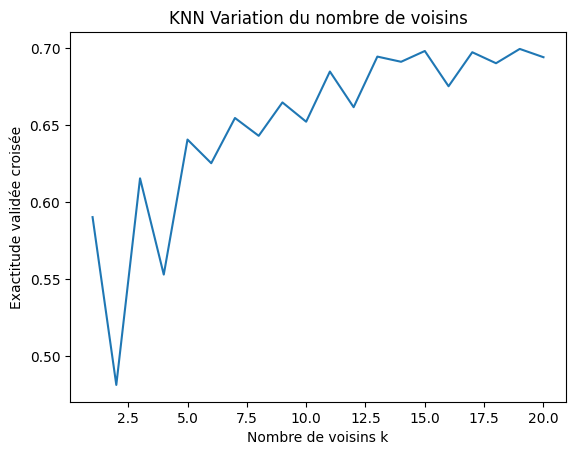

In [ ]:
plt.plot(range(1, 21), cv_scores)
plt.xlabel('Nombre de voisins k')
plt.ylabel('Exactitude validée croisée')
plt.title('KNN Variation du nombre de voisins')
plt.show()

Mesurer la précision

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')

print(f"Précision : {accuracy}")


Précision : 0.6650537634408602


#L'appretissage pa réseau de neuronne


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# definir le modele reseau de neuronne
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:

import numpy as np

X_train = np.array(X_train)
y_train = np.array(y_train)
print(X_train.dtype, y_train.dtype)

print(np.unique(y_train))
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
print(np.unique(y_train))


history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

float64 object
['No' 'Yes']
[0 1]
Epoch 1/50
595/595 [==============================] - 5s 5ms/step - loss: 0.6077 - accuracy: 0.7139 - val_loss: 0.5927 - val_accuracy: 0.7238
Epoch 2/50
595/595 [==============================] - 2s 4ms/step - loss: 0.6023 - accuracy: 0.7139 - val_loss: 0.5894 - val_accuracy: 0.7238
Epoch 3/50
595/595 [==============================] - 2s 3ms/step - loss: 0.6011 - accuracy: 0.7139 - val_loss: 0.5867 - val_accuracy: 0.7238
Epoch 4/50
595/595 [==============================] - 2s 3ms/step - loss: 0.5994 - accuracy: 0.7139 - val_loss: 0.5846 - val_accuracy: 0.7238
Epoch 5/50
595/595 [==============================] - 1s 2ms/step - loss: 0.6000 - accuracy: 0.7139 - val_loss: 0.5871 - val_accuracy: 0.7238
Epoch 6/50
595/595 [==============================] - 1s 2ms/step - loss: 0.5979 - accuracy: 0.7139 - val_loss: 0.5865 - val_accuracy: 0.7238
Epoch 7/50
595/595 [==============================] - 2s 3ms/step - loss: 0.5991 - accuracy: 0.7139 - val_loss: 0.

In [ ]:
from sklearn.preprocessing import LabelEncoder
X_test = np.array(X_test)
y_test = np.array(y_test)
print(X_test.dtype, y_test.dtype)
if isinstance(y_test[0], str):

    label_encoder = LabelEncoder()
    y_test = label_encoder.fit_transform(y_test)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

float64 object
59/59 [==============================] - 0s 6ms/step - loss: 0.5982 - accuracy: 0.7113
Loss: 0.5982178449630737
Accuracy: 0.7112902998924255
